In [1]:
import os
import sys
sys.path.append('../')
from src.compress_sensing_library import *
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
import pywt
import pandas as pd

In [2]:
img_list = ["image/tree_part1.jpg", "image/", "image/city_part2.png", "image/city_part3.png", "image/city.png"]
big_img = "image/city_grayscaled.png"

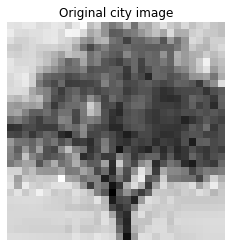

In [6]:
image_nm = img_list[0]
save_nm = image_nm.split('/')[1].split('.')[0]
root = "../"
img = Image.open(os.path.join(root + image_nm))
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.axis('off')
plt.title('Original city image')
plt.imshow(img_arr, 'gray')

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type =  'db1'
lv = 1

# V1

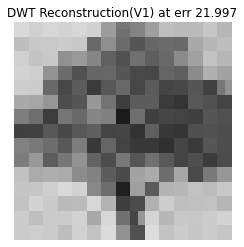

Error: 21.99711037450253


In [5]:
W_V1, y_V1 = generate_V1_variables(img_arr, num_cell, cell_size, cell_freq, )
theta_V1, reconst_V1, s_V1 = reconstruct(W_V1, y_V1, alpha = alpha, method = 'dwt', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(V1) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_V1))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_V1, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_V1))

# Gaussian

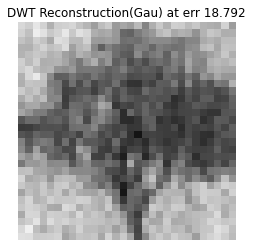

Error: 18.792100145375397


In [7]:
W_Gau, y_Gau = generate_gaussian_variables(img_arr, num_cell)
theta_Gau, reconst_Gau, s_Gau = reconstruct(W_Gau, y_Gau, alpha = alpha / 2, method = 'dct', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(Gau) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_Gau))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_Gau, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_Gau))

/home/bans/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1860003.3813123838, tolerance: 1060563.9770903974
  model = cd_fast.enet_coordinate_descent(


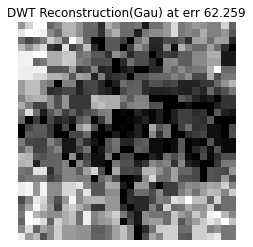

Error: 62.2585504963527


In [10]:
W_Gau, y_Gau = generate_gaussian_variables(img_arr, num_cell)
theta_Gau, reconst_Gau, s_Gau = reconstruct(W_Gau, y_Gau, alpha = alpha / 2, method = 'dwt', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(Gau) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_Gau))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_Gau, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_Gau))

# Classical

In [ ]:
W_Cla.shape
# y_Cla.shape

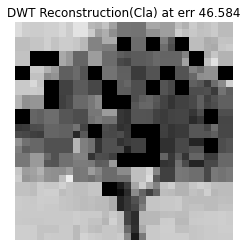

Error: 46.584490571547356


In [7]:
W_Cla, y_Cla = generate_classical_variables(img_arr, num_cell)
theta_Cla, reconst_Cla, s_Cla = reconstruct(W_Cla, y_Cla, method = 'dwt', lv = lv, dwt_type = dwt_type)
title = "DWT Reconstruction(Cla) at err {err:.3f}".format(err = error_calculation(img_arr, reconst_Cla))
plt.title(title)
plt.axis('off')
plt.imshow(reconst_Cla, 'gray', vmin = 0, vmax = 255)
plt.clim(0, 255)
# plt.savefig(title+".png", dpi = 300)
plt.show()
print("Error:", error_calculation(img_arr, reconst_Cla))

# Color Reconstruct

3

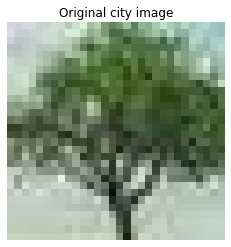

In [4]:
image_nm = img_list[0]
save_nm = image_nm.split('/')[1].split('.')[0]
root = "../"
img = Image.open(os.path.join(root + image_nm))
img_arr = np.asarray(img)
plt.axis('off')
plt.title('Original city image')
plt.imshow(img_arr)

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type =  'db1'
lv = 1
len(img_arr.shape)

Process Reconstruction on (30, 30, 3) image


/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/bans/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(


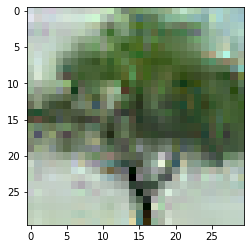

In [9]:
plt.imshow(filter_reconstruct(img_arr, num_cell, cell_size, cell_freq, observation = 'v1', mode = 'color', method = 'dwt'))

Process Reconstruction on (30, 30, 3) image


30.642689902233528

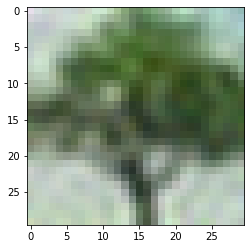

In [17]:
observation = 'V1'
method = 'dct'
reconst = filter_reconstruct(img_arr, num_cell, cell_size, cell_freq, alpha = alpha, method = method, observation = observation, mode = 'color')
plt.imshow(reconst)


Process Reconstruction on (540, 720, 3) image


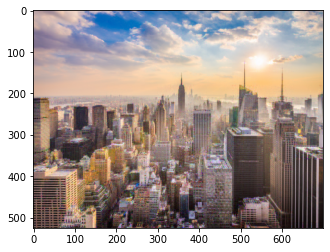

In [8]:
reconst = filter_reconstruct(img_arr, num_cell, cell_size, cell_freq, filter_dim = (30, 30), alpha = alpha, method = 'dct', observation = 'pixel', lv = 4, dwt_type = 'db2', mode = 'color')
plt.imshow(reconst.astype(int))

In [7]:
plt.imshow(reconst)

NameError: name 'reconst' is not defined

# Test Filter Reconstruction

In [3]:
img_list[-1]

'image/city.png'

(525, 700, 3)

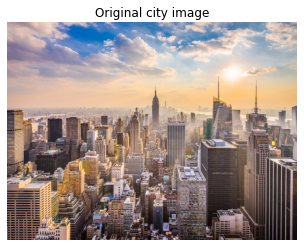

In [3]:
image_nm = img_list[-1]
mode = 'color'
save_nm = image_nm.split('/')[1].split('.')[0]
root = "../"
img = Image.open(os.path.join(root + image_nm))
if (mode != 'color'):
    img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.axis('off')
plt.title('Original city image')
plt.imshow(img_arr, 'gray')

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type =  'db1'
lv = 1
img_arr.shape

Process Reconstruction on (540, 720, 3) image


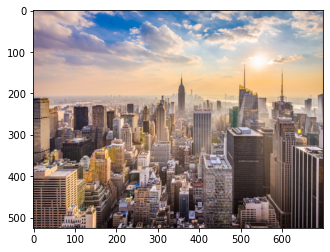

In [5]:
plt.imshow(filter_reconstruct(
    img_arr, 
    num_cell, 
    cell_size, 
    cell_freq, 
    alpha = alpha, 
    method='dct',
    observation='v1',
    lv=4,
    dwt_type='db2', 
    mode = mode
))

In [6]:
plt.imshow(filter_reconstruct(
    img_arr, 
    num_cell, 
    alpha = alpha, 
    method='dct',
    observation='gaussian',
    mode = mode
))

TypeError: filter_reconstruct() missing 2 required positional arguments: 'cell_size' and 'sparse_freq'